## **Downloading Dataset**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
PATH = "/content/drive/My Drive/My Master Project/paper/Simple CNNs - Ensemble Member/"

## **Import Libraries**

In [3]:
import cv2
import numpy as np
import tensorflow as tf
import keras
import pandas as pd



from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import classification_report, accuracy_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from collections import Counter
import matplotlib.pyplot as plt
get_ipython().magic(u'matplotlib inline')
import glob

## **Read Dataset**

## **Ensemble Members' Predictions**

In [4]:
val_data = pd.read_csv(PATH+ 'val_results.csv').to_numpy()
test_data = pd.read_csv(PATH+ 'test_results.csv').to_numpy()

train_x = val_data[:,:-1].round()
test_x = test_data[:,:-1]

train_y = val_data[:,-1].round()
test_y = test_data[:,-1]

In [5]:
print("shape of train_x is: {}".format(train_x.shape))
print("shape of train_y is: {}".format(train_y.shape))
print("shape of test_x is: {}".format(test_x.shape))
print("shape of test_y is: {}".format(test_y.shape))

shape of train_x is: (445, 7)
shape of train_y is: (445,)
shape of test_x is: (446, 7)
shape of test_y is: (446,)


## **Meta Model**

**Model Evaluation**

In [6]:
def evaluateModel(preds_y):



  print('----------Model Evaluation----------')
  print("\n")

  accuracy = accuracy_score(test_y, preds_y)
  print('accuracy:', accuracy)
  print("\n\n")

  print('----------Model ROC----------')
  print("\n")
  fpr, tpr, _ =  roc_curve(test_y, preds_y)
  roc_auc = auc(fpr, tpr)
  print('ROC:', roc_auc)
  print("\n")
  plt.figure()
  lw = 2
  plt.plot(fpr, tpr, color='darkorange',
          lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic')
  plt.legend(loc="lower right")
  plt.show()
  print("\n\n")

  print('----------Model Precision, Recalll and F1 Score----------')
  print("\n")
  print(classification_report(test_y, preds_y, digits=4, target_names = ['normal', 'fracture']))

  print("\n\n")
  print('----------Confusion matrix----------')
  print("\n")


  confusion_mat = confusion_matrix(test_y, preds_y)

  cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_mat, display_labels = ['normal', 'fracture'])

  cm_display.plot(cmap='Blues')
  plt.show()


## SVM

In [56]:
#Model
svm = SVC(kernel='rbf', C=3, gamma=1)  # RBF kernel allows learning circular boundaries
# svm = SVC(kernel='poly')  # degree and coef0 control the curve of the boundary

In [57]:
svm.fit(train_x, train_y)

SVC(C=3, gamma=1)

----------Model Evaluation----------


accuracy: 0.9080717488789237



----------Model ROC----------


ROC: 0.90722033284366




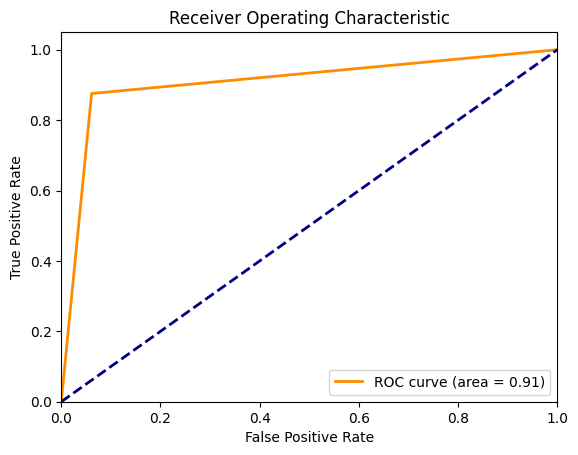




----------Model Precision, Recalll and F1 Score----------


              precision    recall  f1-score   support

      normal     0.8884    0.9389    0.9130       229
    fracture     0.9314    0.8756    0.9026       217

    accuracy                         0.9081       446
   macro avg     0.9099    0.9072    0.9078       446
weighted avg     0.9093    0.9081    0.9079       446




----------Confusion matrix----------




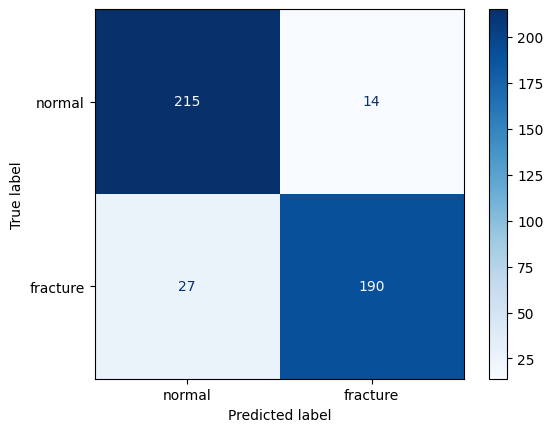

In [58]:
y_pred = svm.predict(test_x)
evaluateModel(y_pred)

## **KNN**

In [54]:
K = []
training = []
test = []
scores = {}

for k in range(2, 30):
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(train_x, train_y)
    training_score = clf.score(train_x, train_y)
    test_score = clf.score(test_x, test_y)
    K.append(k)

    training.append(training_score)
    test.append(test_score)
    scores[k] = [training_score, test_score]

for keys, values in scores.items():
    print(keys, ':', values)



2 : [0.8696629213483146, 0.8475336322869955]
3 : [0.9213483146067416, 0.8968609865470852]
4 : [0.9213483146067416, 0.8968609865470852]
5 : [0.9056179775280899, 0.9080717488789237]
6 : [0.9078651685393259, 0.905829596412556]
7 : [0.903370786516854, 0.9147982062780269]
8 : [0.9168539325842696, 0.9125560538116592]
9 : [0.9101123595505618, 0.9147982062780269]
10 : [0.9101123595505618, 0.9170403587443946]
11 : [0.9101123595505618, 0.9192825112107623]
12 : [0.9146067415730337, 0.9147982062780269]
13 : [0.9146067415730337, 0.9147982062780269]
14 : [0.9123595505617977, 0.9192825112107623]
15 : [0.9146067415730337, 0.9147982062780269]
16 : [0.9101123595505618, 0.9170403587443946]
17 : [0.9123595505617977, 0.9147982062780269]
18 : [0.9123595505617977, 0.9170403587443946]
19 : [0.9168539325842696, 0.9192825112107623]
20 : [0.9146067415730337, 0.9170403587443946]
21 : [0.9101123595505618, 0.9147982062780269]
22 : [0.9078651685393259, 0.9170403587443946]
23 : [0.9078651685393259, 0.9170403587443946

----------Model Evaluation----------


accuracy: 0.9192825112107623



----------Model ROC----------


ROC: 0.9188618115227497




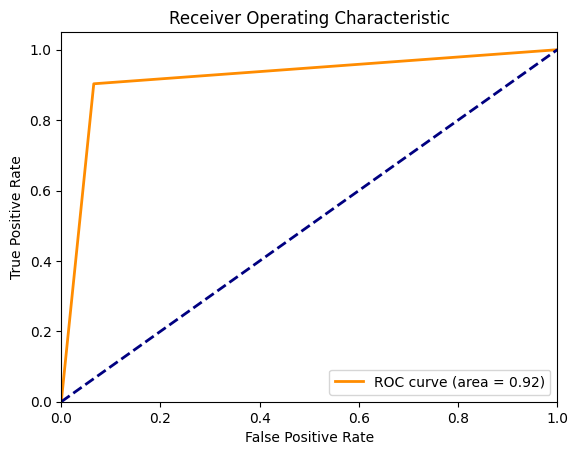




----------Model Precision, Recalll and F1 Score----------


              precision    recall  f1-score   support

      normal     0.9106    0.9345    0.9224       229
    fracture     0.9289    0.9032    0.9159       217

    accuracy                         0.9193       446
   macro avg     0.9198    0.9189    0.9192       446
weighted avg     0.9195    0.9193    0.9192       446




----------Confusion matrix----------




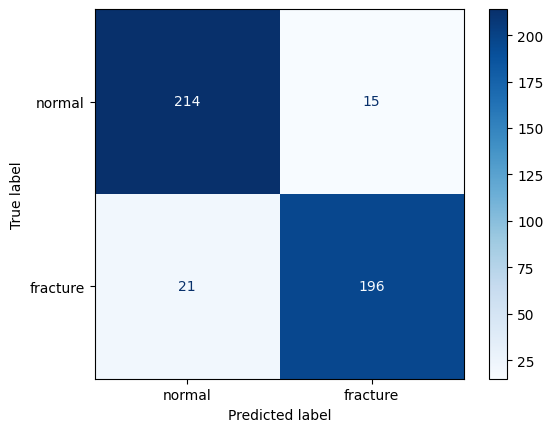

In [55]:
KNN = KNeighborsClassifier(n_neighbors = 11)
KNN.fit(train_x, train_y)
preds_y= KNN.predict(test_x)
evaluateModel(preds_y)

# **Decision Tree**

----------Model Evaluation----------


accuracy: 0.8834080717488789



----------Model ROC----------


ROC: 0.8825991588352484




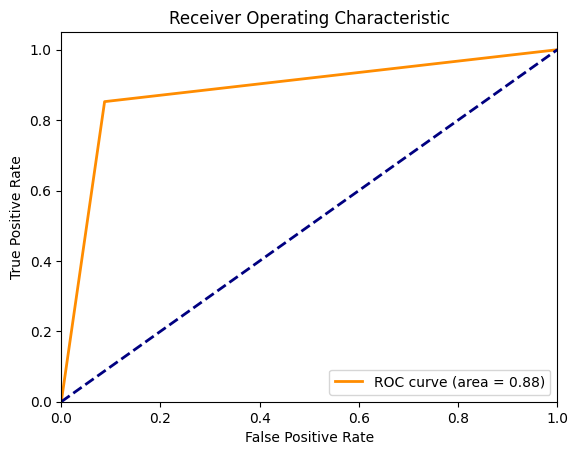




----------Model Precision, Recalll and F1 Score----------


              precision    recall  f1-score   support

      normal     0.8672    0.9127    0.8894       229
    fracture     0.9024    0.8525    0.8768       217

    accuracy                         0.8834       446
   macro avg     0.8848    0.8826    0.8831       446
weighted avg     0.8844    0.8834    0.8832       446




----------Confusion matrix----------




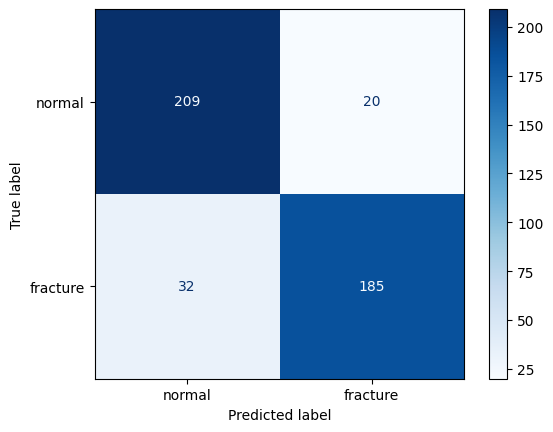

In [27]:
dtc = DecisionTreeClassifier()
dtc.fit(train_x, train_y)
preds_y = dtc.predict(test_x)

evaluateModel(preds_y)

# **Random Forest**

----------Model Evaluation----------


accuracy: 0.9147982062780269



----------Model ROC----------


ROC: 0.9141327752399735




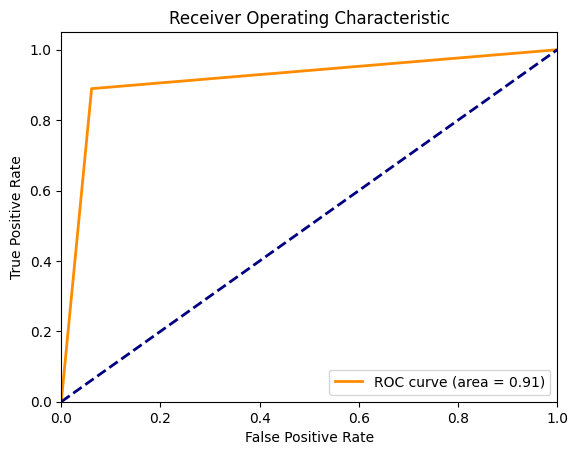




----------Model Precision, Recalll and F1 Score----------


              precision    recall  f1-score   support

      normal     0.8996    0.9389    0.9188       229
    fracture     0.9324    0.8894    0.9104       217

    accuracy                         0.9148       446
   macro avg     0.9160    0.9141    0.9146       446
weighted avg     0.9155    0.9148    0.9147       446




----------Confusion matrix----------




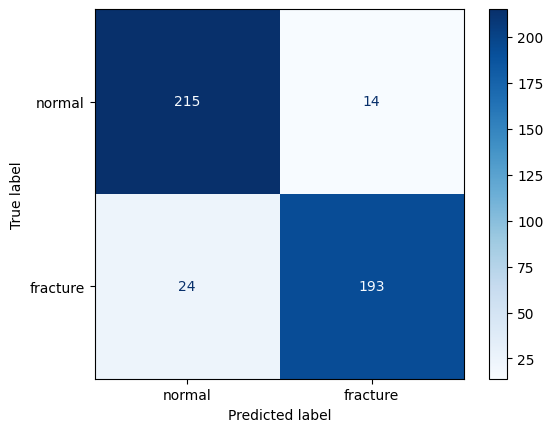

In [63]:
clf = RandomForestClassifier(max_depth=3, random_state=0)
clf.fit(train_x, train_y)

preds_y = clf.predict(test_x)

evaluateModel(preds_y)

# **MLP**

----------Model Evaluation----------


accuracy: 0.9170403587443946



----------Model ROC----------


ROC: 0.9170406294649147




/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


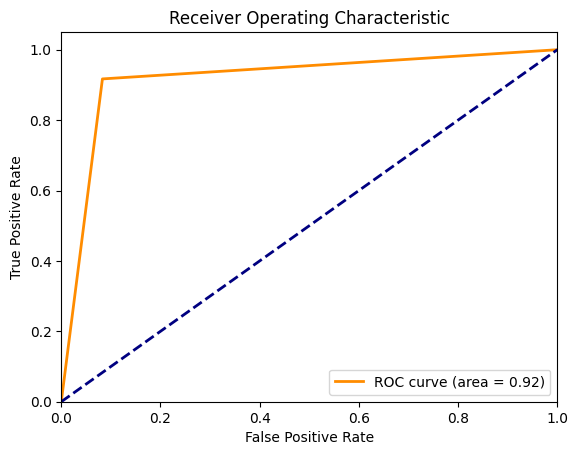




----------Model Precision, Recalll and F1 Score----------


              precision    recall  f1-score   support

      normal     0.9211    0.9170    0.9190       229
    fracture     0.9128    0.9171    0.9149       217

    accuracy                         0.9170       446
   macro avg     0.9169    0.9170    0.9170       446
weighted avg     0.9171    0.9170    0.9170       446




----------Confusion matrix----------




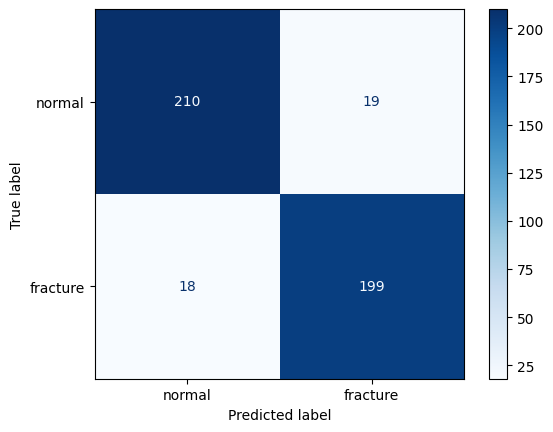

In [51]:
mlp = MLPClassifier(random_state=10, max_iter=300, validation_fraction= 0.2, solver="sgd").fit(train_x, train_y)
preds_y = mlp.predict(test_x)

evaluateModel(preds_y)